This algorithm uses something called fixed point iteration which states that :


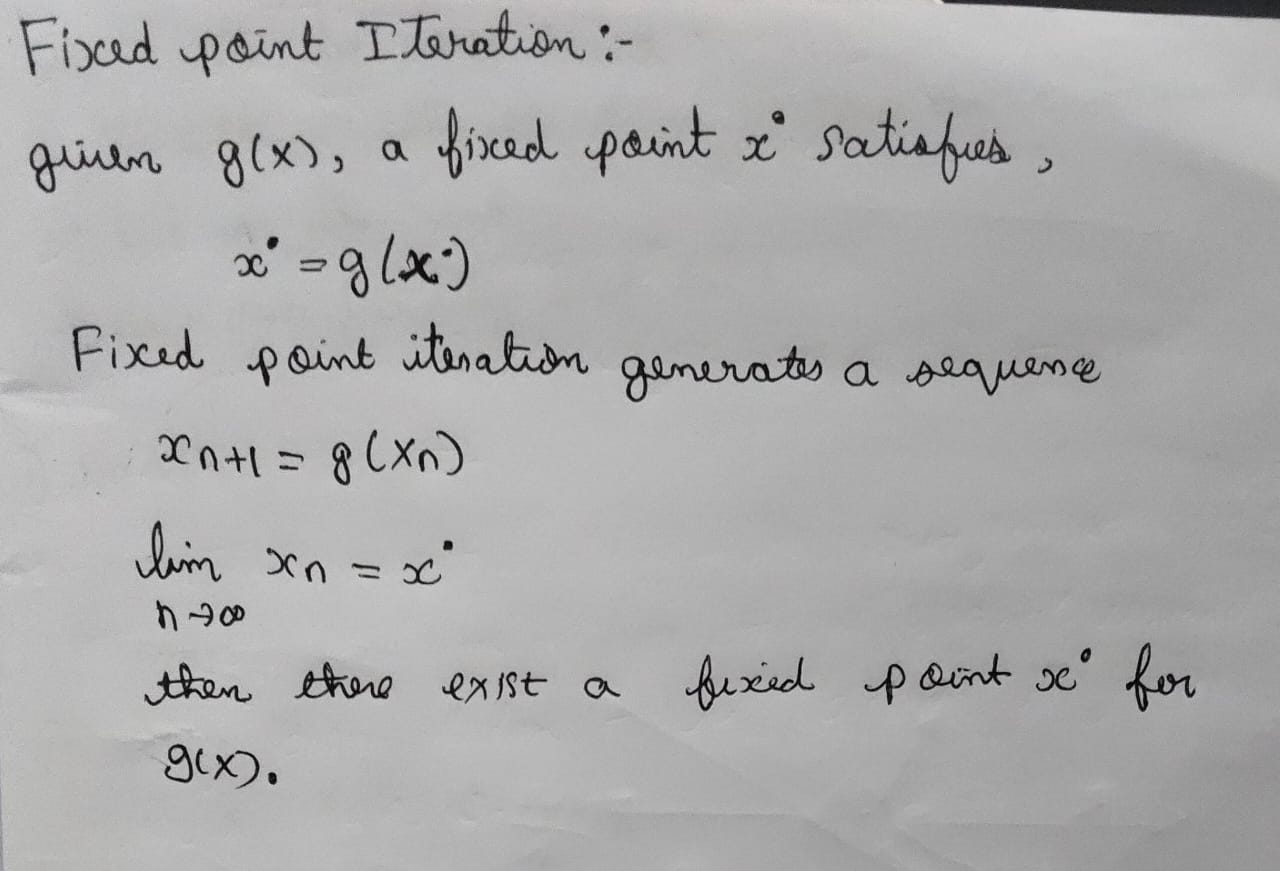

In [ ]:
def calculate_steady_state_temp(Ta, T):

  Tw = 323.0


  while True:
    Tw_old = Tw

    # 1. Magnet temp (Tm)
    Tm = (Ta + Tw) / 2

    # 2. Remanence (B)
    B = 1.32 - 1.2e-3 * (Tm - 293)

    # 3. Phase current (i)
    i = 0.561 * B * T

    # 4. Resistance (R)
    R = 0.0575 * (1 + 0.0039 * (Tw - 293))

    # 5. Copper loss (Pc)
    Pc = 3 * (i**2) * R

    # 6. Eddy loss (Pe)
    Pe = (9.602e-6 * (B * T)**2) / R

    # 7. Update Tw
    Tw = 0.455 * (Pc + Pe) + Ta

    # Check if the temperature has stabilized.
    if abs(Tw - Tw_old) < 1.0:
      break # The change is small enough, so we exit the loop.

  return Tw